**Algerian Forest fire EDA practical implementation
Life cycle of machine learning project**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**1) Problem statement**

**The dataset comparises of two regions of Algeria , namely the Bejia region located in the northerneast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria 

If user can predict that Algerian forest will catch fire or not based on input feature

Prediction result can be used for Forest Fore Situatiion Trackers and make correct Prevention to Avoid it in future
**

**DATA COLLECTION**

In [ ]:
df = pd.read_csv('/content/Algerian_forest_fires_dataset_UPDATE (1).csv',header = 1)

DATA READING AND CLEANING

**IMPORT DATA AND REQUIRED PACKAGES**

In [ ]:
df.head()#Top 5 data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [ ]:
df.tail()#Bottom 5 data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
246,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


**SHAPE OF DATA**

In [ ]:
df.shape

(247, 14)

**SUMMARY OF DATA**

In [ ]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,127,9
top,1,7,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


**CHECK DATA TYPE IN THE DATASET**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


**DATA CLEANING**

REMOVING UNNESSARY ROWS FROM DATA SET

In [ ]:
df.drop(index=[122,123],inplace=True)
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace = True)

**ADDING NEW FEATURE IN DATA SET 'REGION'**

In [ ]:
df.loc[:122,'region']='Bejaia'
df.loc[122:,'region']='Siddi-bel Abbes'

In [ ]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'region'],
      dtype='object')

**STRIPING THE NAMES OF COLUMN**

In [ ]:
df.columns=[i.strip() for i in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

**STRIPING THE CLASSES FEATURES DATA**

In [ ]:
df.Classes=df.Classes.str.strip()
df['Classes'].unique()

array(['not fire', 'fire', 'Classes', nan], dtype=object)

In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,Bejaia
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,Bejaia
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,Bejaia


**CHANGING THE DATA TYPE OF DATASET**

In [ ]:
df['day']=df['day'].astype(int)

ValueError: ignored

**ADDING NEW FEATURE , NAMED DATE BY REPLAICING UNNESSARY FEATURE LIKE DAY,MONTH ,YEAR**

In [ ]:
df['date']=pd.to_datetime(df[["day","month","year"]])
df.drop(["day","month","year"],axis = 1 , inplace = True)

ValueError: ignored

**SHOWING UPDATED DATASET AFTER MODIFICATION DONE**

In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,Bejaia
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,Bejaia
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,Bejaia


# EXPLORING THE DATA

**PROFILE OF THE DATA
  
  SHAPE OF THE DATA**

In [ ]:
df.shape

(245, 15)



```
# OBSERVATION

  In this dataset there are 13 Column and 144 rows
```





```
Column of the dataset
```



In [ ]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')



```
Check mising value in Dataset
```



In [ ]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
region         0
dtype: int64



```
# Observation 

  we got one null values in Classes feature 
```



**Handling with categorical feature **

In [ ]:
df['Classes']=df['Classes'].map({'not fire':0,'fire':1})
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,Bejaia
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0.0,Bejaia
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,Bejaia
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0.0,Bejaia
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0.0,Bejaia


In [ ]:
df['Classes']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
240    1.0
241    0.0
242    0.0
243    0.0
244    0.0
Name: Classes, Length: 245, dtype: float64

In [ ]:
df['Classes'].mode()[0]

1.0

**Focus on Replacing Null value**

In [ ]:
df['Classes']=df['Classes'].fillna(df['Classes'].mode()[0])

In [ ]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
dtype: int64

**Obsevation**

```
After modification now we have Zero Null value in dataset
```

**

In [ ]:
df['Classes'].unique()

array([0., 1.])

**Check data type in Dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          245 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4   RH           245 non-null    object 
 5   Ws           245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      245 non-null    float64
 14  region       245 non-null    object 
dtypes: float64(1), object(14)
memory usage: 28.8+ KB


**Observation**


```
There is total 244 rows and 13 coumns.
There are no Null value in DataSet 
There is total 4 data types float64 , int64 , object and datetime64.
Dtype Include float64=7 Column , int64 = 2 Columns , object = 3 columns and datetime64 =1 
Total Memory usage is 23.0+ KB
```



In [ ]:
df.memory_usage()

Index           128
day            1960
month          1960
year           1960
Temperature    1960
RH             1960
Ws             1960
Rain           1960
FFMC           1960
DMC            1960
DC             1960
ISI            1960
BUI            1960
FWI            1960
Classes        1960
region         1960
dtype: int64

**Numerical and Categorical Colulmns**

```
Numericals dataset
```



In [ ]:
num_fea = [fea for fea in df.columns if df[fea].dtypes != 'O']
print('We have {} numerical features : {}'.format(len(num_fea),num_fea))

We have 1 numerical features : ['Classes']




```
Categorical dataset
```



In [ ]:
cat_fea = [fea for fea in df.columns if df[fea].dtypes == 'O']
print('We have {} categorical features : {}'.format(len(cat_fea),cat_fea))

We have 14 categorical features : ['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'region']




```
Features Information
```



In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,Bejaia
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0.0,Bejaia
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,Bejaia
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0.0,Bejaia
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0.0,Bejaia


**Wheather Data Observations**

```
Temperature: Temperature noon (temperature max) in Celcius degrees : 28.6 to 92.6
(DMC)Duff moisture code index from the FWI system : 1.1 to 65.9
(DC) Drought code index from the FWI system : 7 to 220.4
(ISI) Initial spread index from the FWI system : 0 to 18.5 
(BUI) Buldup index from the FWI index system : 1.1 to 68 
(FWI) Fire wheather index : 0 to 31.1

Classes : two classes , namely Fire and not Fire .

Region : Two region , namely Bejia region indicated  with 0 and Sidi Bel-Abbes region indicated with 1
```



**DATE Observation (DD/MM/YYYY)** :-

```
Date displayed in (DD/MM/YYYY) format in dataset
```
**Univariate Analysis**


```
The term univariate analysis refers to the analysis of single  variable
```




In [ ]:
df.var()

Classes    0.24647
dtype: float64

**Numericals Features**

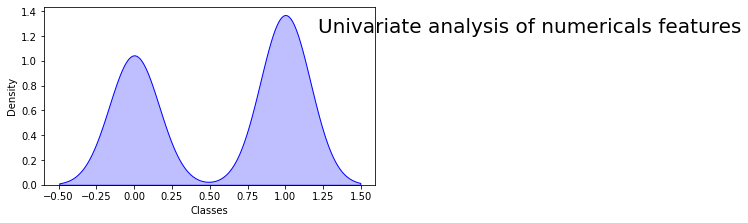

In [ ]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate analysis of numericals features',fontsize = 20)
for i in range(0,len(num_fea)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df[num_fea[i]],shade=True,color='b')

    plt.xlabel(num_fea[i])
    plt.tight_layout()
    
    

**Observation**

```
Rain , ISI , BUI , DMC are right skewed and positively skewed.
FFMC is a left and Negatively skewed .
Outliers in Rain , ISI , BUI , DMC and FFMC
```
**Scatter plot to see the trends in each numericals column**


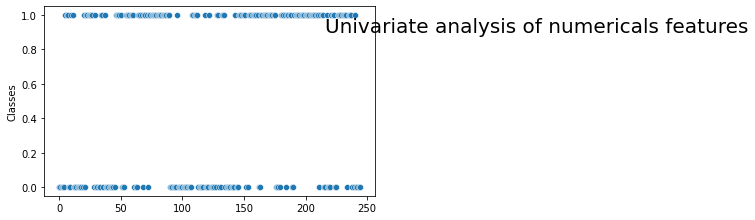

In [ ]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate analysis of numericals features',fontsize = 20)
for i in range(0,len(num_fea)):
    plt.subplot(5,3,i+1)
    sns.scatterplot(y=num_fea[i],x=df.index,data=df)
    plt.tight_layout()

Categorical features

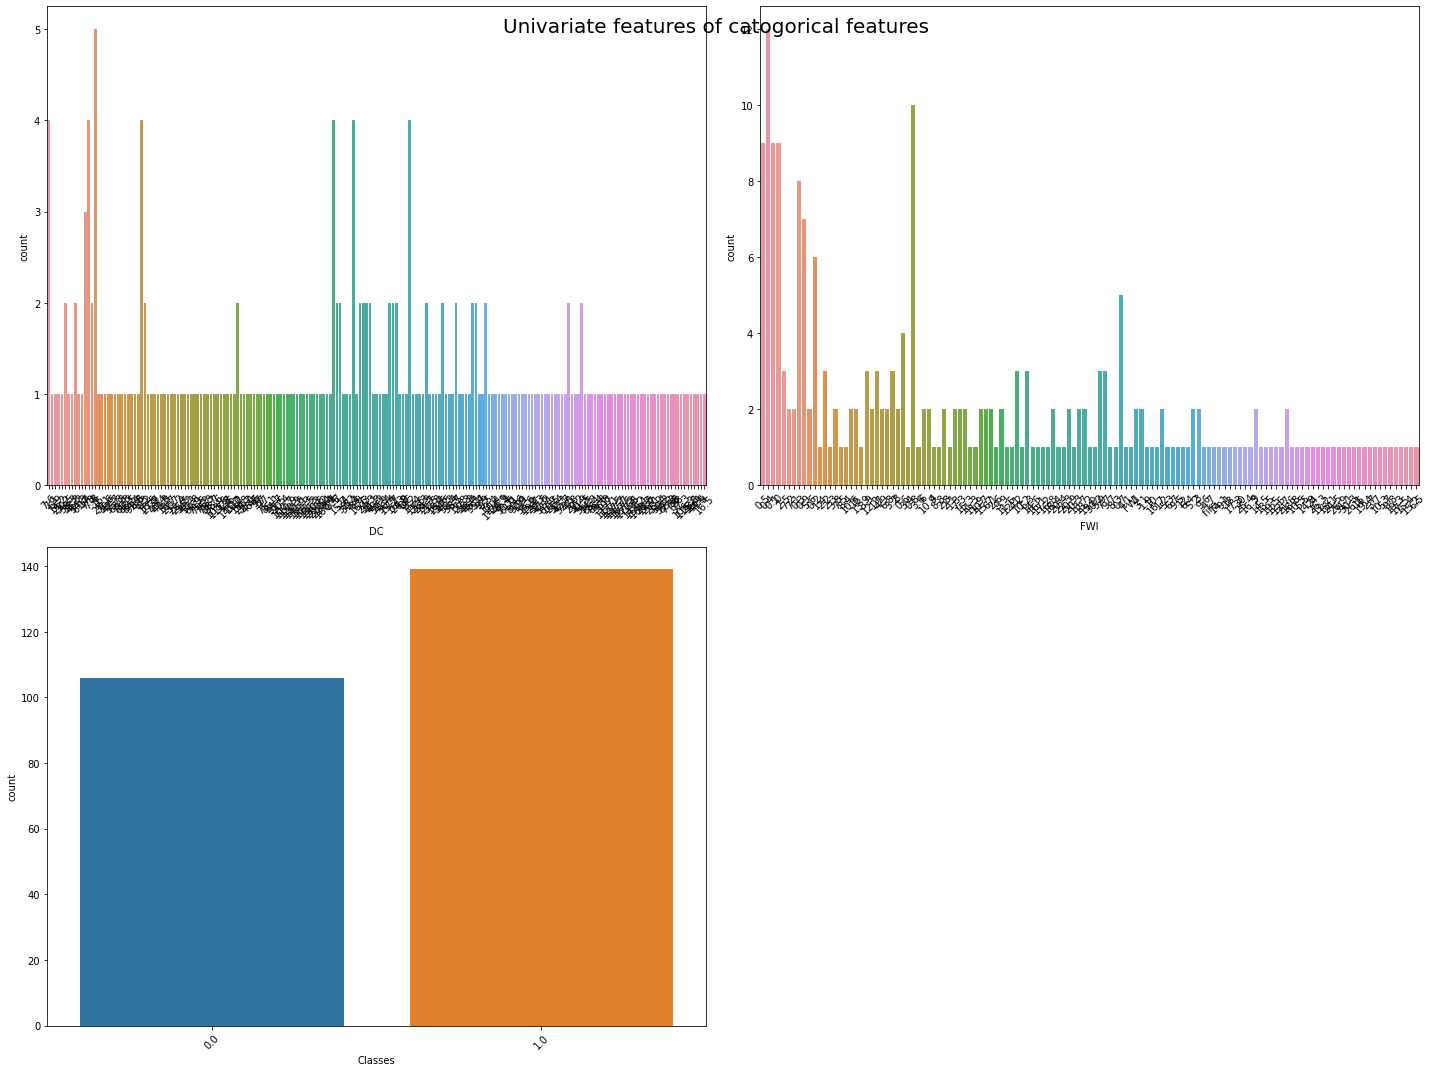

In [ ]:
plt.figure(figsize=(20,15))
plt.suptitle('Univariate features of catogorical features',fontsize=20)
cat1=['DC','FWI','Classes']
for i in range(0,len(cat1)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

**Obsevation**


```
Extreme value of Temperature is above 40
Most of the time RH is above 30
Ws values lie between 10 to 20
```


Bivariate analysis and multivariate analyis 
straight (categorical vs numericals )
scatter / pairplot  (numericals numericals ) (check correlation)
boxplot (outliers)
heatmap (correlation)
lineplot (trend in numericals feature with line)

**Multicolleniarity in numerical features**



In [ ]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.607551,0.455504,0.518119
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.690637,-0.348587,-0.435023
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.015248,0.029756,-0.066529
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.347105,-0.299171,-0.379449
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.739730,0.589652,0.770114
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.674499,0.982073,0.584188
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,1.000000,0.635891,0.735511
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.635891,1.000000,0.583882
Classes,0.518119,-0.435023,-0.066529,-0.379449,0.770114,0.584188,0.735511,0.583882,1.000000


<AxesSubplot:>

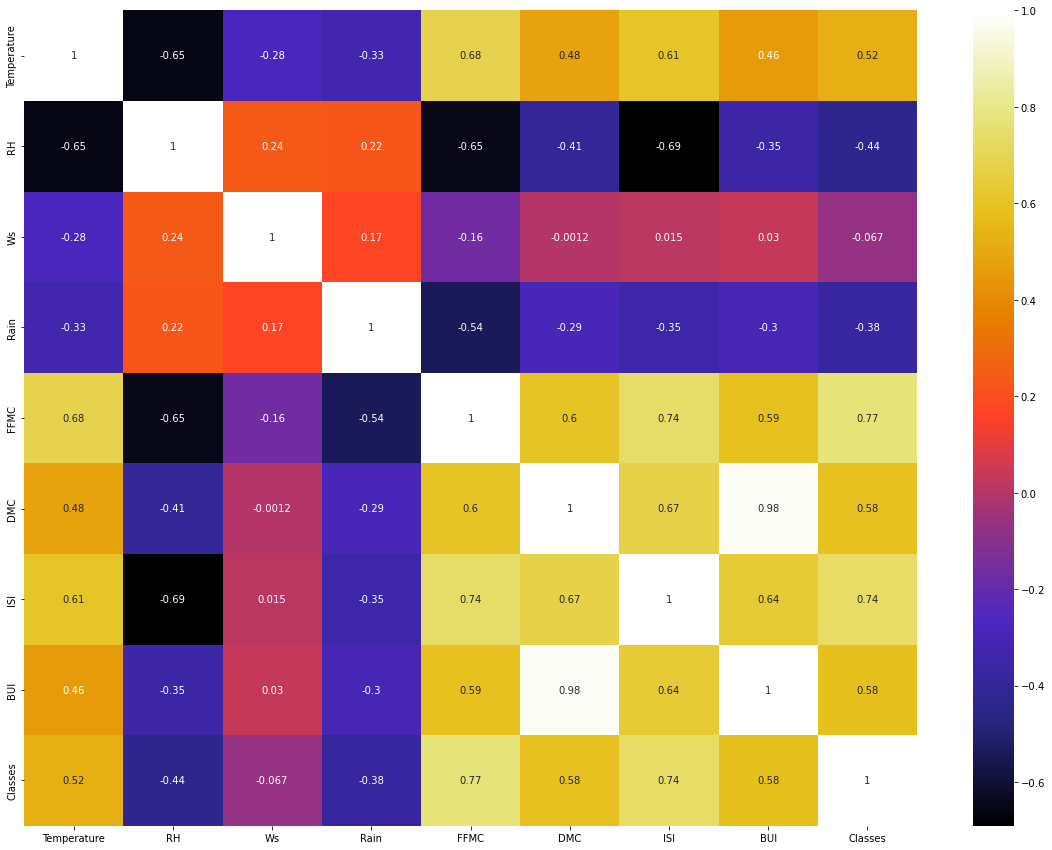

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),cmap='CMRmap',annot = True)

**Observation**


```
Highly +ve correlated features are DMC and 
Highly -ve correlated features are RH and  temp. RH FFMC , RH and ISI

```
**Strip plot to see the relationship between numericals features and target**



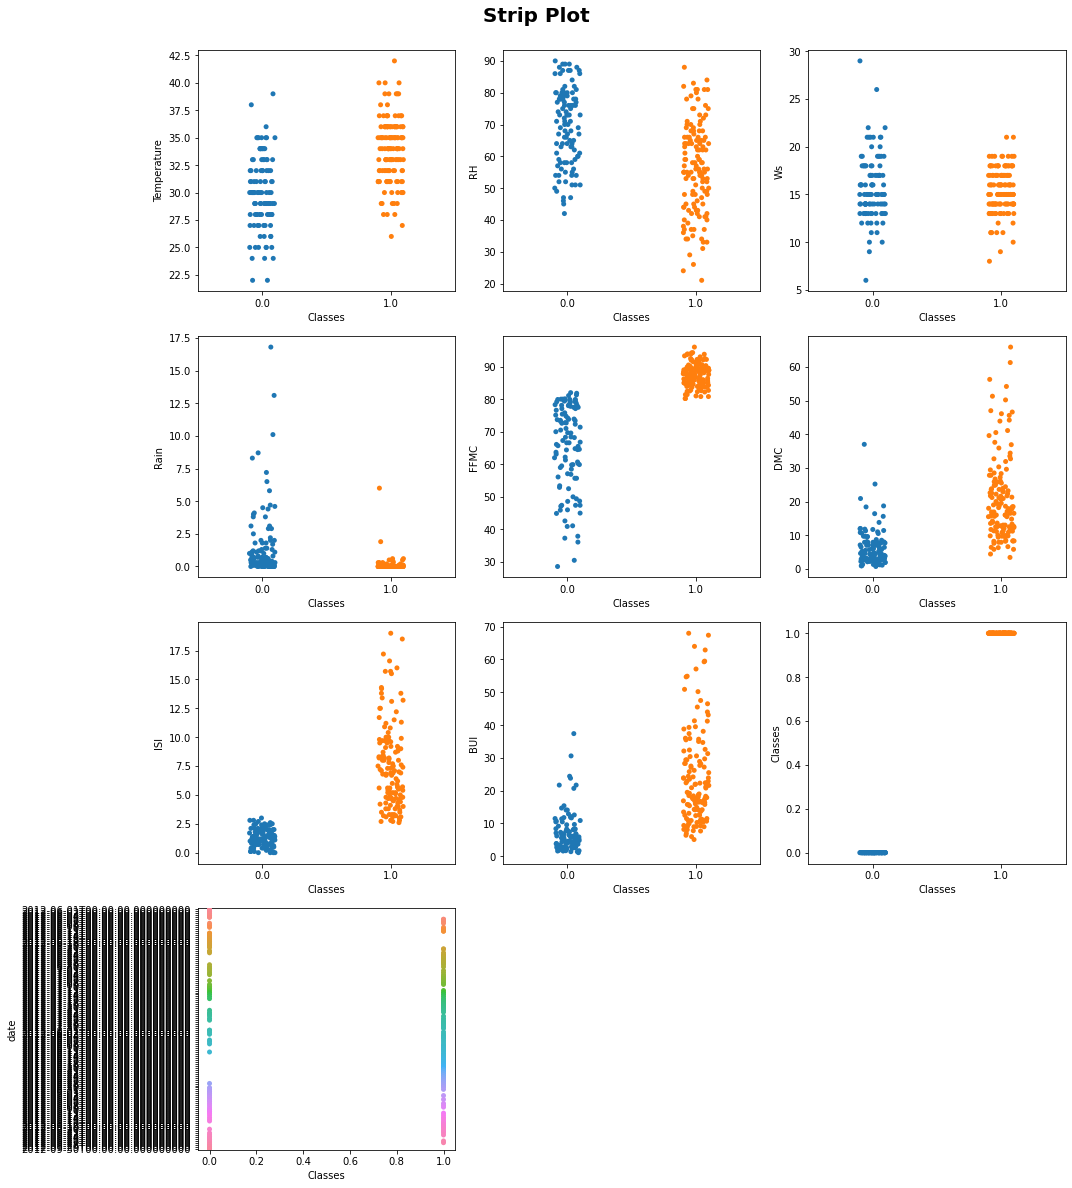

In [ ]:
plt.figure(figsize=(15,20))
plt.suptitle('Strip Plot',fontsize=20,fontweight='bold',alpha=1,y=1)
for i in range(0,len(num_fea)):
    plt.subplot(5,3,i+1)
    sns.stripplot(y=num_fea[i],x='Classes',data=df)
    plt.tight_layout()

**Observation:-**



```
Note:- here O = not Fire and 1 = fire
places with higher temperature has fire 
places with lower RH has fire 


places with ffmc > 80 has fire 
places with ISI > 2.5
places with Rain < has fire
```

**Box plot to find Outliers in the features **



<AxesSubplot:>

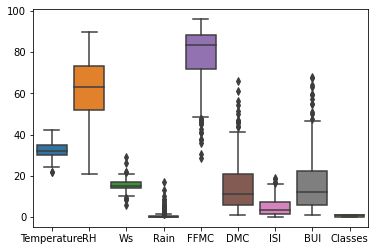

In [ ]:
sns.boxplot(data=df,orient="v")

**Observation**


```
RH , Rain , FFMC , DMC , BUI has many outliers
```



Statistical Analysis

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,244.0,32.172131,3.633843,22.0,30.000,32.00,35.000,42.0
RH,244.0,61.938525,14.884200,21.0,52.000,63.00,73.250,90.0
Ws,244.0,15.504098,2.810178,6.0,14.000,15.00,17.000,29.0
Rain,244.0,0.760656,1.999406,0.0,0.000,0.00,0.500,16.8
FFMC,244.0,77.887705,14.337571,28.6,72.075,83.50,88.300,96.0
DMC,244.0,14.673361,12.368039,0.7,5.800,11.30,20.750,65.9
ISI,244.0,4.774180,4.175318,0.0,1.400,3.50,7.300,19.0
BUI,244.0,16.664754,14.204824,1.1,6.000,12.25,22.525,68.0
Classes,244.0,0.565574,0.496700,0.0,0.000,1.00,1.000,1.0


**Observation**


```
df.describe() return all Statistics Summary of Numeric Columns

Its Return funcition like :- count(),mean(),min(),25%(),50%(),75%(),max()
```


Graphical Analysis

<AxesSubplot:xlabel='region', ylabel='Classes'>

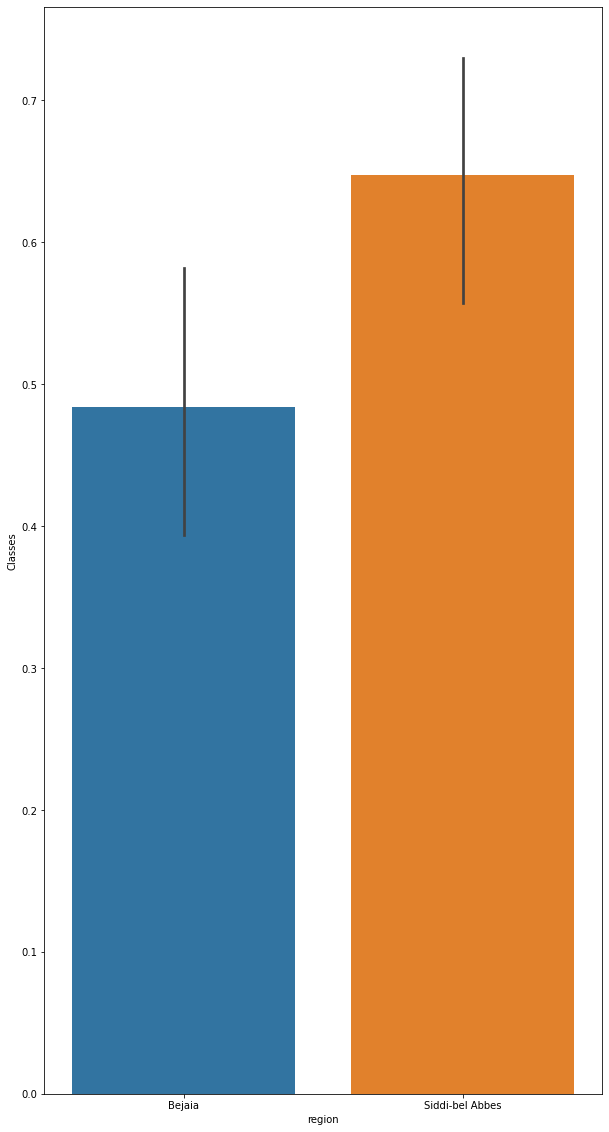

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(10,20)
sns.barplot(x='region',y='Classes',data=df)

**Observation**


```
Sidi-Bel-Abbes Region has most of the Time Fire took placed
```



Temperatue Range which is in the most of the places

<AxesSubplot:xlabel='Temperature', ylabel='Count'>

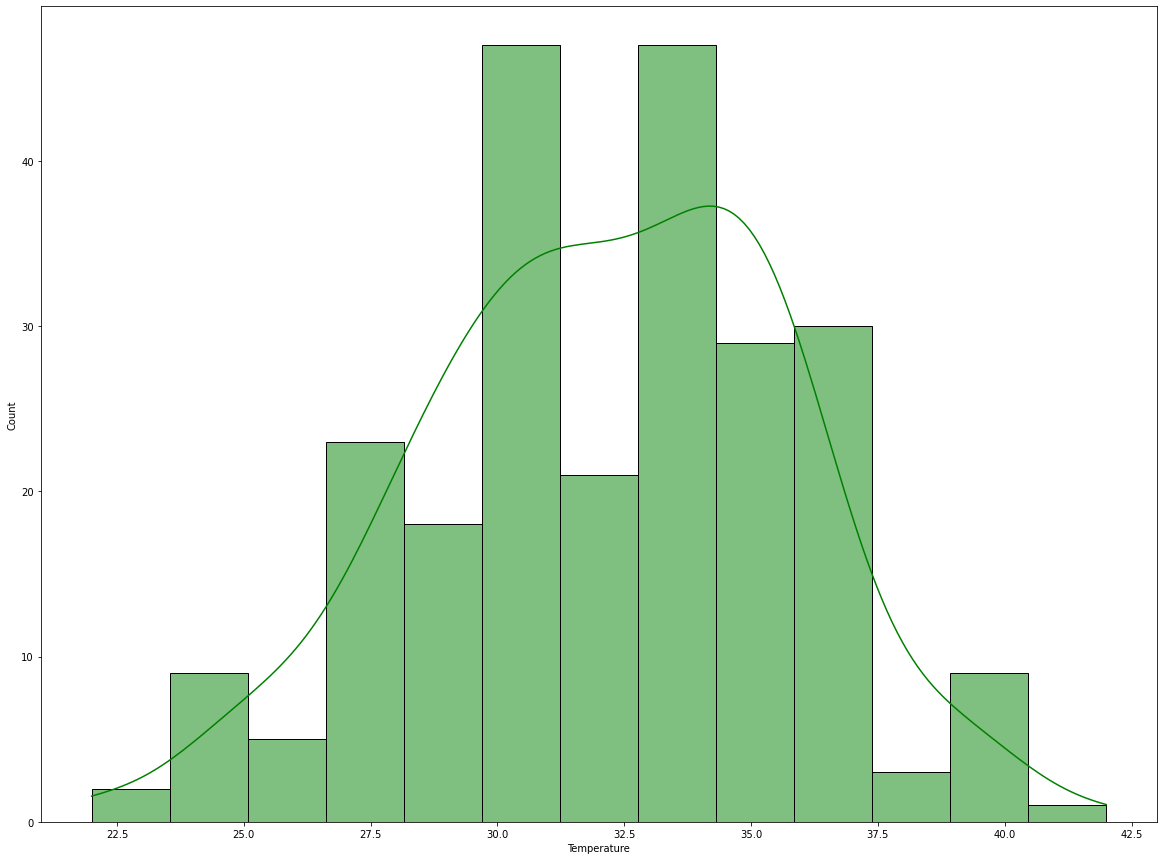

In [ ]:
plt.subplots(figsize=(20,15))
sns.histplot('Distribution of temperatue',x=df.Temperature,color='g',kde=True)

**Observation**


```
Temperature occur most of the time in range 32.5 to 35.0
```
**Highest Temperature attained **


<AxesSubplot:xlabel='Temperature', ylabel='Classes'>

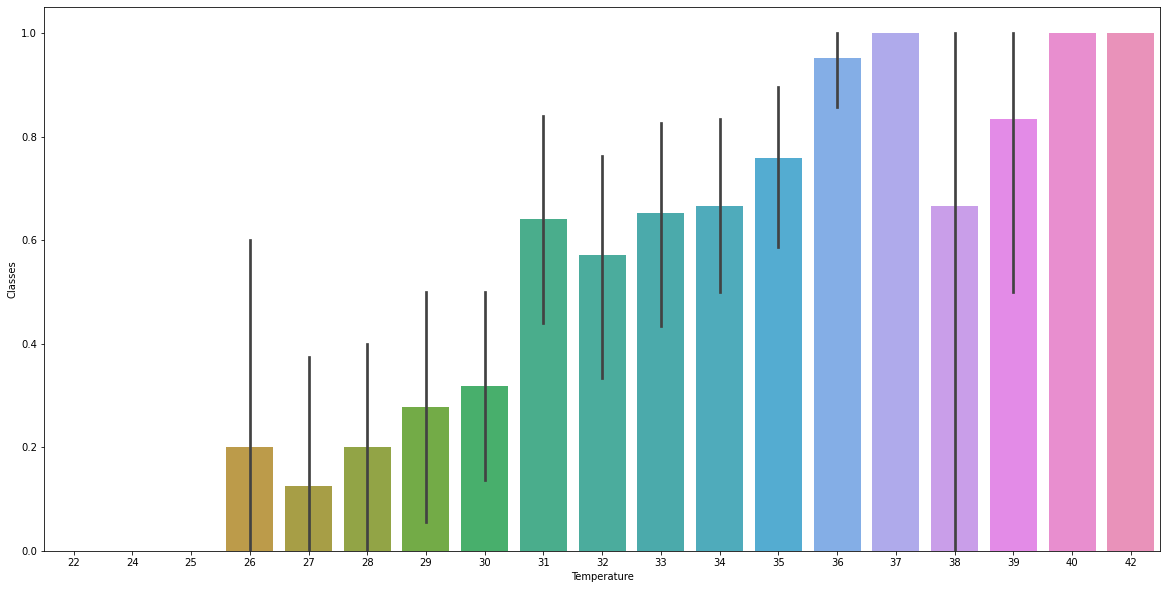

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
sns.barplot(x='Temperature',y='Classes',data=df)

**Observation**
Highest temperatue is 42,40,37

**Which region has most time rain happens **

<AxesSubplot:xlabel='region', ylabel='Rain'>

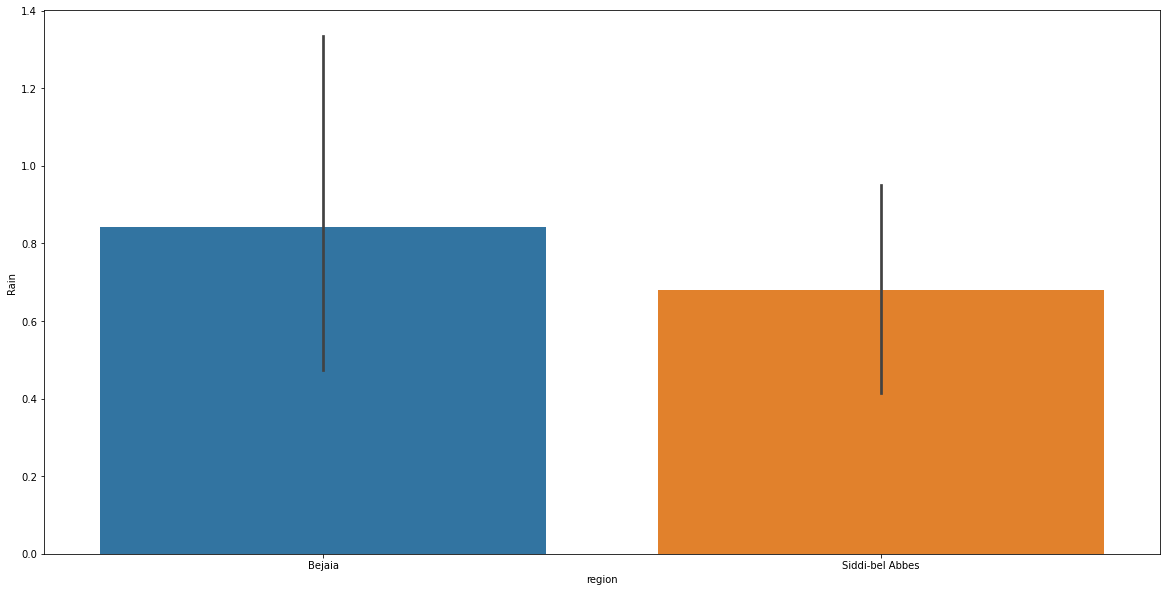

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
sns.barplot(x='region',y='Rain',data=df)

**Observation**
Bejia is the region in which most of the time rain happens

**Boxplot to find outliers in the features**

<AxesSubplot:>

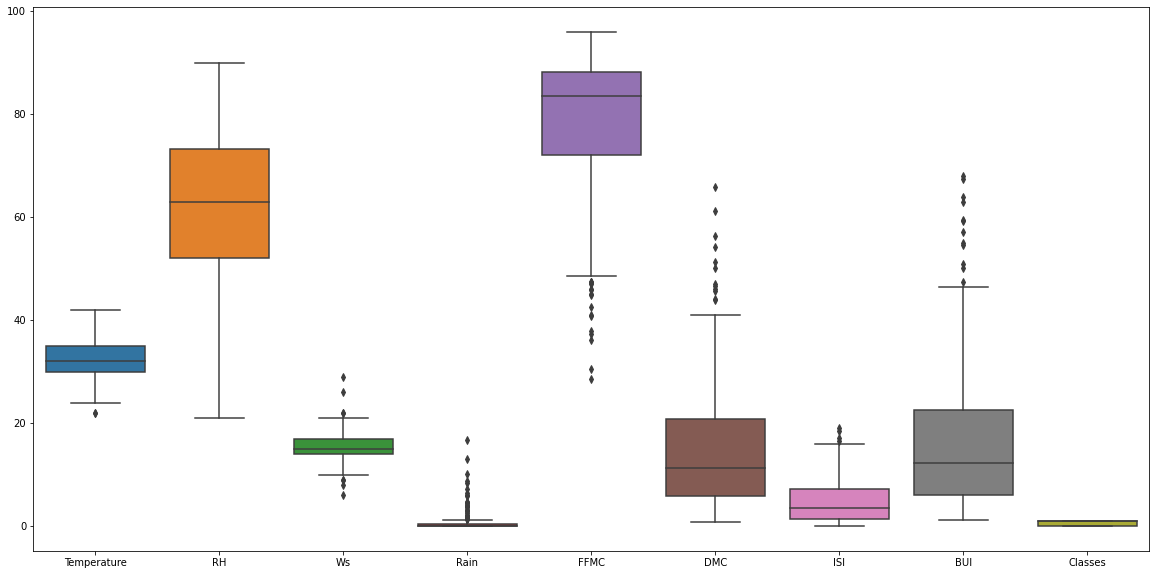

In [ ]:
sns.boxplot(data=df,orient="v")

**Observation**


```
RH,Rain,FFMC,DMC BUI has many outliers
```



**Boxplot of Class Vs temperature**

<AxesSubplot:xlabel='Classes', ylabel='Temperature'>

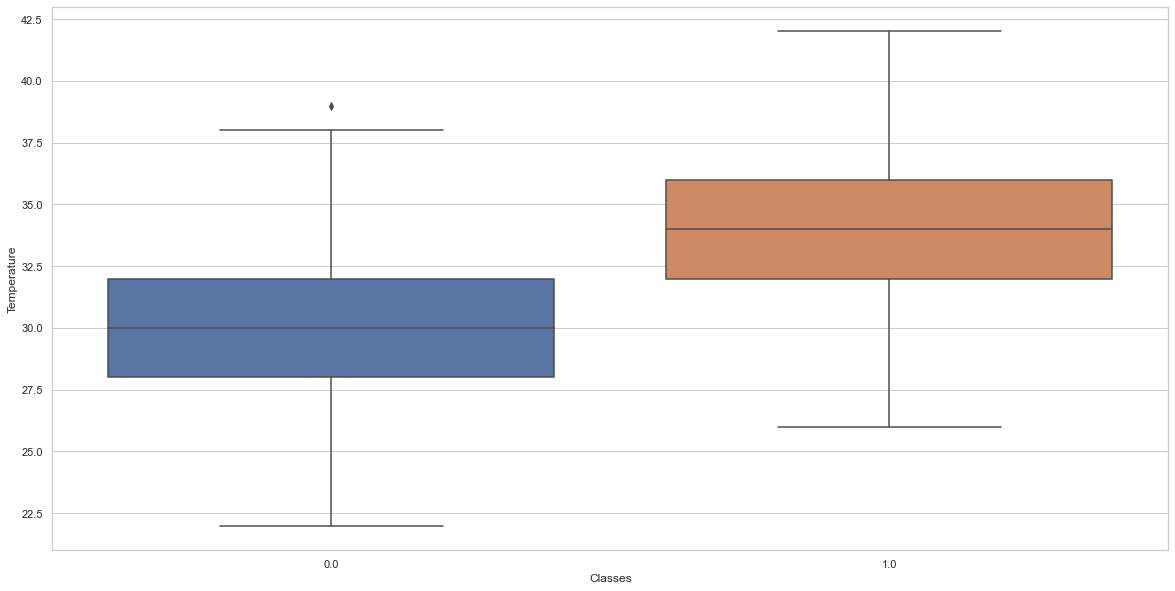

In [ ]:
import seaborn
seaborn.set(style="whitegrid")
seaborn.boxplot(x='Classes',y='Temperature',data=df)

**Observation**


```
One day at lower temperature fires occur
```
**Boxplot of Classes Vs Rain**



<AxesSubplot:xlabel='Classes', ylabel='Rain'>

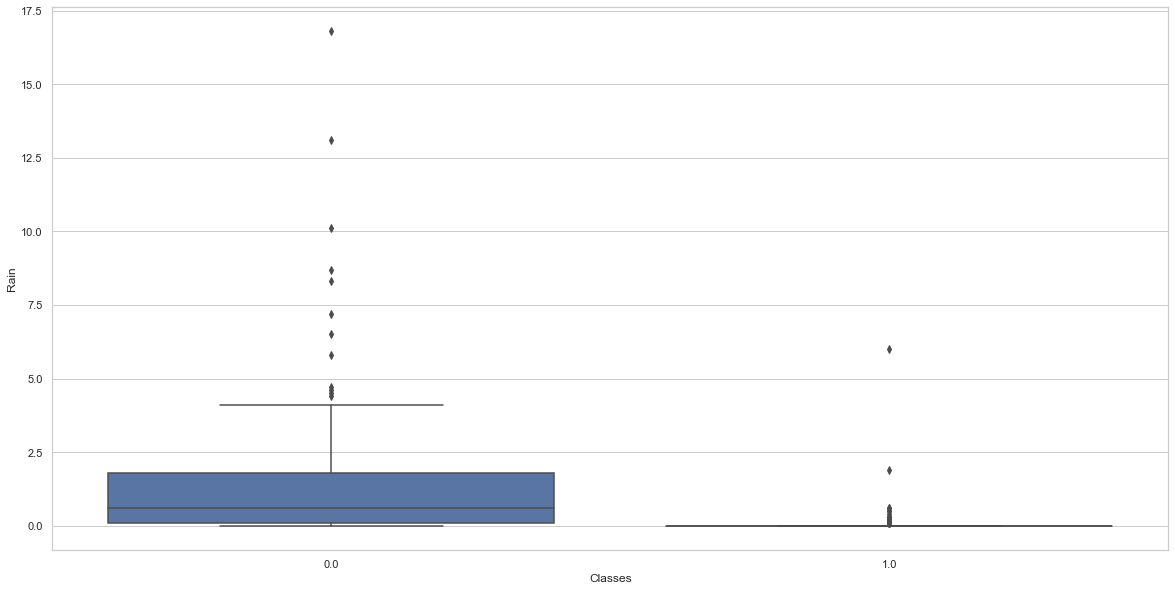

In [ ]:
import seaborn
seaborn.set(style="whitegrid")
seaborn.boxplot(x='Classes',y='Rain',data=df)

**Observation**



```
In many days after having rain also fire occur
```

